<a href="https://colab.research.google.com/github/patilsubhas184/candidate_sourcing_tracker/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import pandas as pd

# Upload ZIP file
uploaded = files.upload()

# Extract it
with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Check extracted files
import os
os.listdir("dataset")


Saving archive (2).zip to archive (2).zip


['ifood_df.csv', 'dictionary.png']

In [5]:
import os

# List all extracted files inside 'dataset' folder
for root, dirs, files in os.walk("dataset"):
    for f in files:
        print(os.path.join(root, f))


dataset/ifood_df.csv
dataset/dictionary.png


In [8]:
import pandas as pd

# replace with the correct file path printed above
df = pd.read_csv("dataset/ifood_df.csv")

df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Check again
df.isnull().sum()


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [11]:
# Summary statistics
df.describe()

# Example metrics
avg_purchase = df['Purchase_Amount'].mean() if 'Purchase_Amount' in df.columns else None
purchase_freq = df['CustomerID'].value_counts().mean() if 'CustomerID' in df.columns else None

print("Average Purchase Value:", avg_purchase)
print("Average Purchase Frequency:", purchase_freq)


Average Purchase Value: None
Average Purchase Frequency: None


In [13]:
df.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [29]:
features = df[['Age', 'Income']]
features = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntGoldProds']]



In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


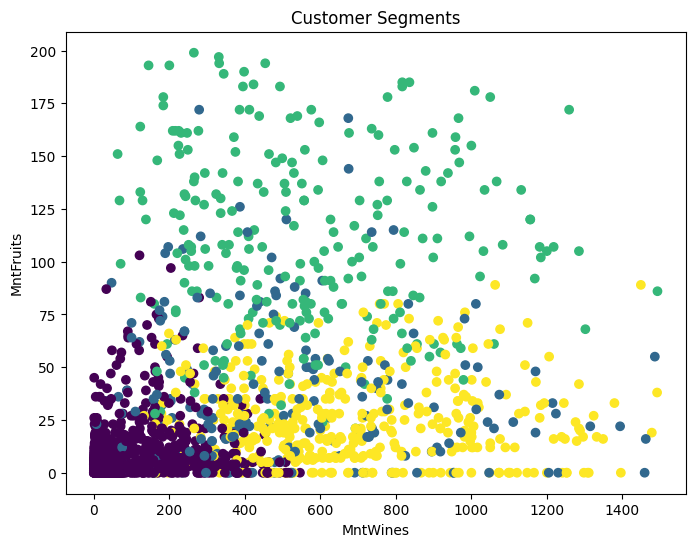

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title('Customer Segments')
plt.show()


In [39]:
df.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Cluster'],
      dtype='object')

In [40]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


               Income   Kidhome  Teenhome    Recency    MntWines   MntFruits  \
Cluster                                                                        
0        38583.555270  0.689803  0.544987  48.537275   85.207369    7.150814   
1        63054.330097  0.150485  0.572816  51.174757  507.339806   37.606796   
2        75000.670732  0.056911  0.211382  47.556911  561.504065  110.138211   
3        69635.781095  0.114428  0.557214  49.512438  689.905473   25.116915   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              36.381320        10.951157          8.317052     18.610968   
1             242.941748        68.378641         48.092233    159.587379   
2             529.247967       109.166667         77.101626     72.215447   
3             280.868159        55.412935         41.119403     40.813433   

         ...  marital_Together  marital_Widow  education